In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Economic Index.csv")

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
## Unnecessary column
df.drop(columns=["Unnamed: 0", "year", "month"],axis=1, inplace=True)

In [7]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [9]:
## Null value check
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


Visualization of data

In [10]:
import seaborn as sns

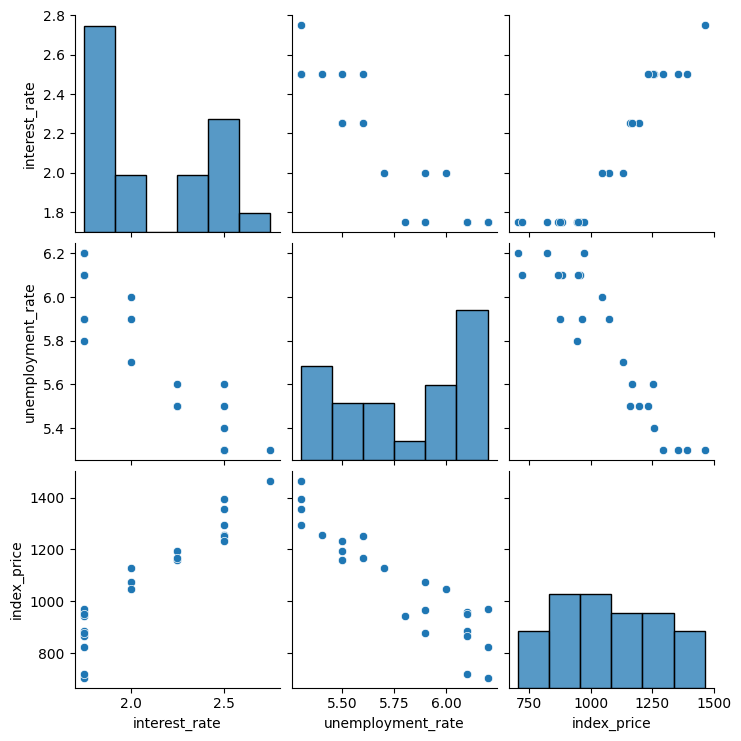

In [11]:
sns.pairplot(df)

In [12]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

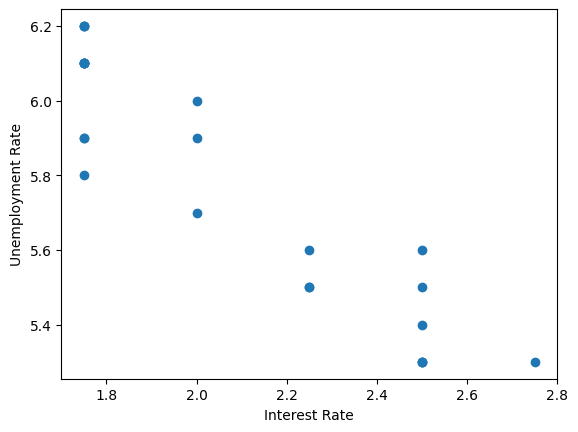

In [15]:
plt.scatter(df['interest_rate'],df['unemployment_rate'])
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

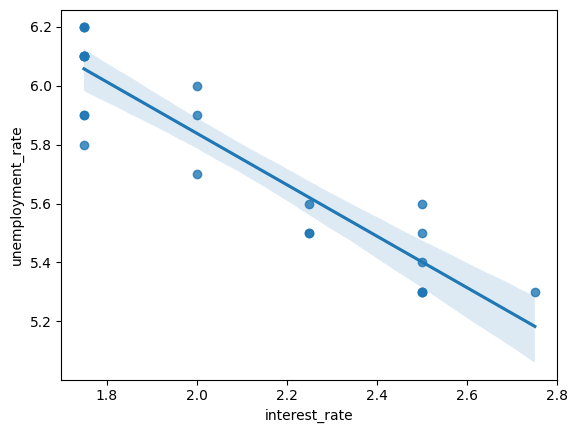

In [28]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])

<Axes: xlabel='interest_rate', ylabel='index_price'>

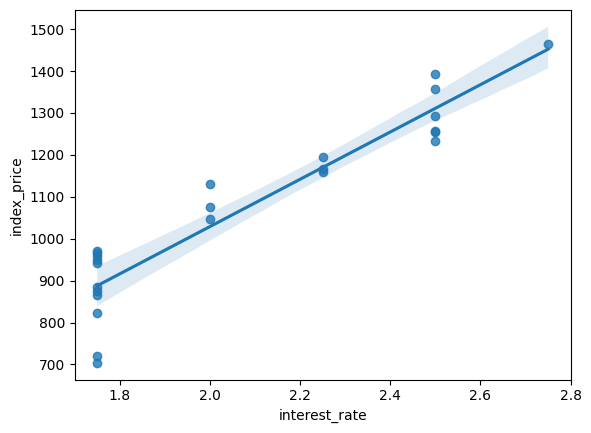

In [30]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

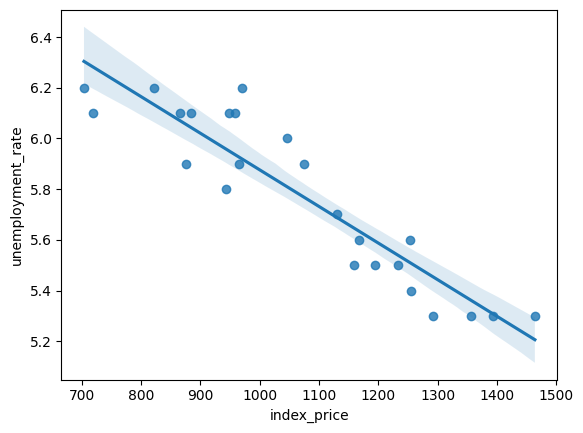

In [31]:
sns.regplot(x=df['index_price'],y=df['unemployment_rate'])

In [16]:
## Independent features
X = df.iloc[:,:-1]

In [17]:
## Dependent feature
y = df.iloc[:,-1]

In [19]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [23]:
y.head()

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
regressor = LinearRegression()

In [37]:
regressor.fit(X_train,y_train)

LinearRegression()

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
validation_score = cross_val_score(regressor,X_train,y_train,scoring="neg_mean_squared_error", cv=5)

In [40]:
validation_score

array([-1861.74046551, -8715.8459466 , -7707.52362191, -9169.13776461,
        -791.32842311])

In [42]:
np.mean(validation_score)

-5649.115244350758

In [43]:
y_pred = regressor.predict(X_test)

In [44]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [47]:
print("MSE ",mse)
print("MAE ",mae)
print("RMSE ",rmse)

MSE  5793.762887712569
MAE  59.935781523235484
RMSE  76.11677139574805


In [48]:
from sklearn.metrics import r2_score

In [49]:
r2_score = r2_score(y_test,y_pred)

In [50]:
print("R2 score ",r2_score)

R2 score  0.8278978091457145


In [52]:
## Adjusted R2
print("Adjusted R2",(1 - (1-r2_score) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)))

Adjusted R2 0.7131630152428576


#### Assumptions

Text(0, 0.5, 'Predicted Data')

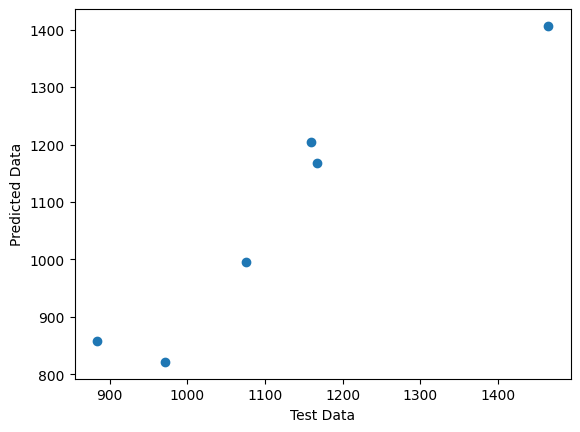

In [54]:
plt.scatter(y_test,y_pred)
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")

In [55]:
residuals = y_test-y_pred

In [56]:
residuals

,index_price
8,-45.227704
16,149.349481
0,57.486996
18,26.291104
11,80.090077
9,-1.169327


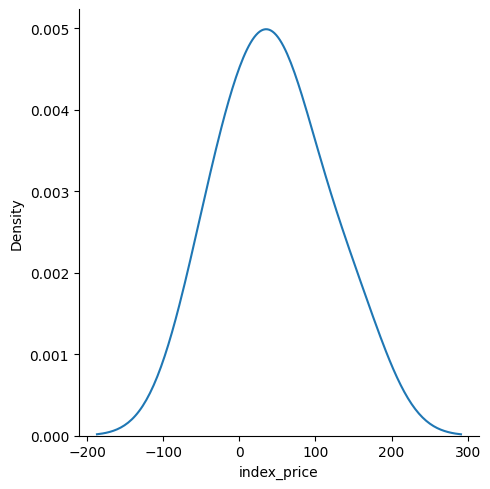

In [57]:
sns.displot(residuals,kind="kde")

Text(0, 0.5, 'Residuals')

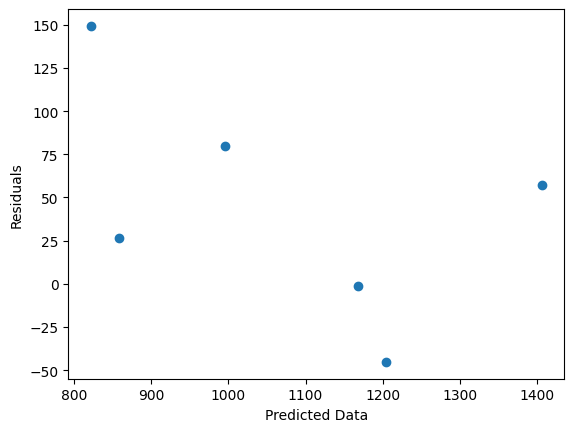

In [60]:
plt.scatter(y_pred,residuals)
plt.xlabel("Predicted Data")
plt.ylabel("Residuals")

In [61]:
import statsmodels.api as sm

In [62]:
ols_model = sm.OLS(y_train,X_train).fit()

In [63]:
pred = ols_model.predict(X_test)

In [64]:
print(ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 12 Nov 2024   Prob (F-statistic):                       0.754
Time:                        13:56:16   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [66]:
regressor.coef_

array([  88.27275507, -116.25716066])